#  **Model For Housing Prices 🏡**

## Importing Python Libraries 🐍

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import plotly.express as px
import plotly.offline as py
from scipy import stats

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

## Getting Data 📂

In [5]:
df=pd.read_csv('housing.csv')

In [6]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observations:-**

    -there are 20,640 instance in the dataset   
    -bedrooms 20433 only rest 207 NA
    -ocean is objet


**Find district for each catagory of ocean_proximity**

In [8]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [9]:
#describe will show the summary of numerical data

df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

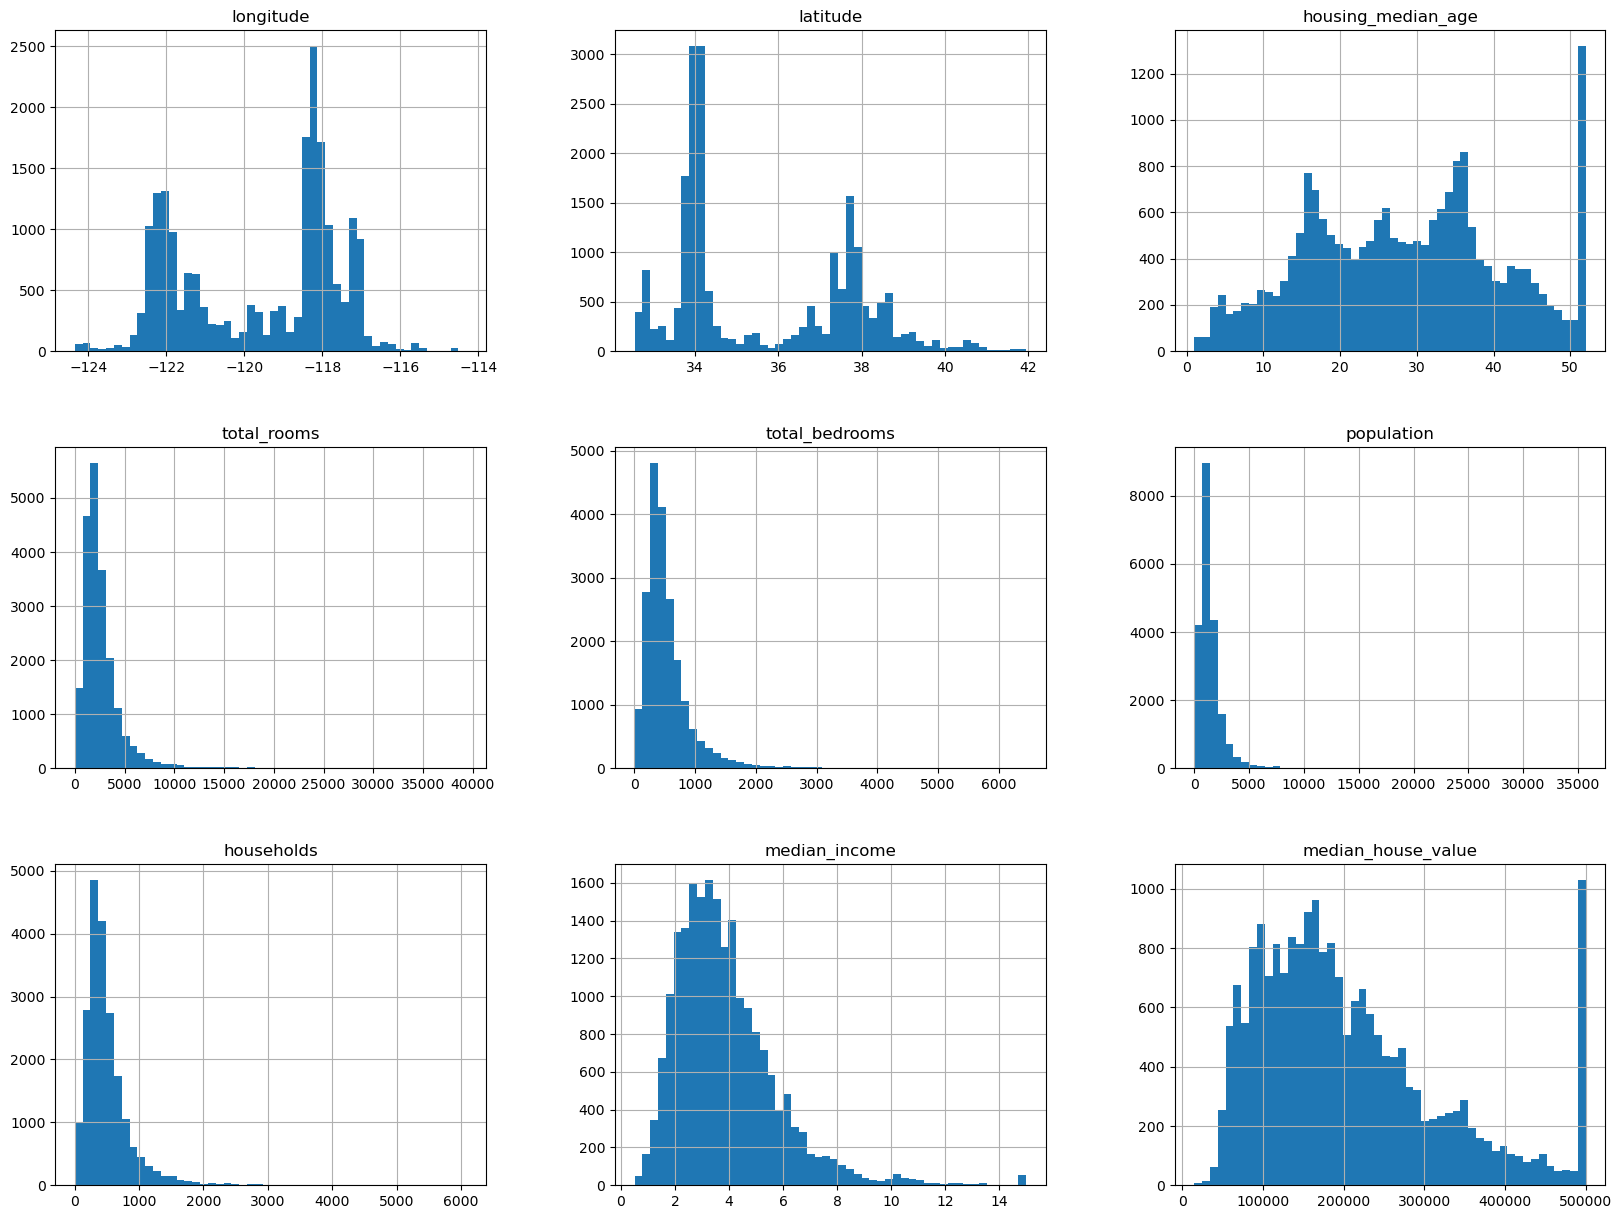

In [10]:
#lets plot a histogram for no. of instances

df.hist(bins=50,figsize=(20,15))

In [11]:
#creating test data

train_set, test_set = train_test_split(df,test_size=0.2,random_state=42)

In [12]:
len(test_set)

4128

In [13]:
df["income_cat"]=pd.cut(df["median_income"],bins=[0., 1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

<Axes: >

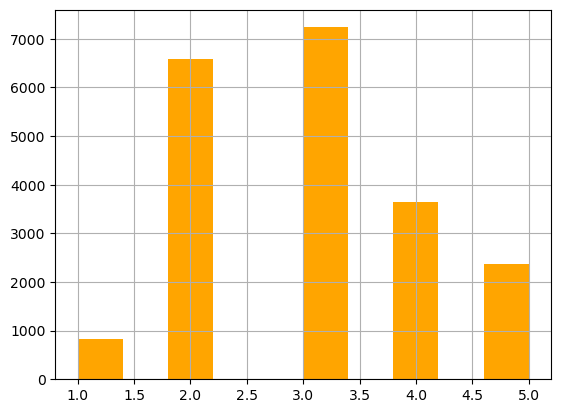

In [14]:
df["income_cat"].hist(color='orange')

In [15]:
#creating a StratifiedShuffleSplit 

split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(df,df["income_cat"]):
    strat_train = df.loc[train_index]
    strat_test = df.loc[test_index]

In [16]:
strat_test["income_cat"].value_counts()/len(strat_test)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [17]:
#removing income cat 

for set_ in (strat_train,strat_test):
    set_.drop("income_cat",axis=1,inplace=True)

## Data Visualizations & Gain Insights 📈

In [18]:
#making copy for the data 

data=strat_train.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

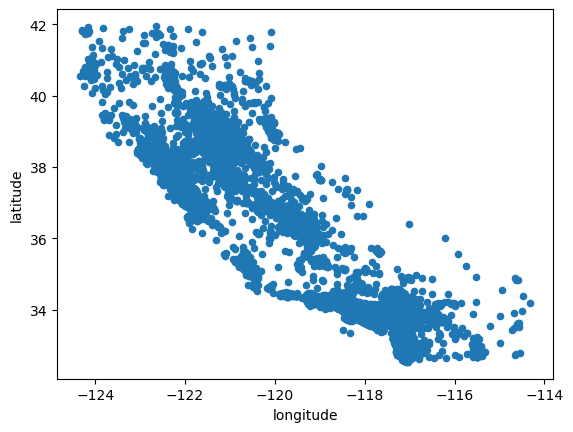

In [19]:
data.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

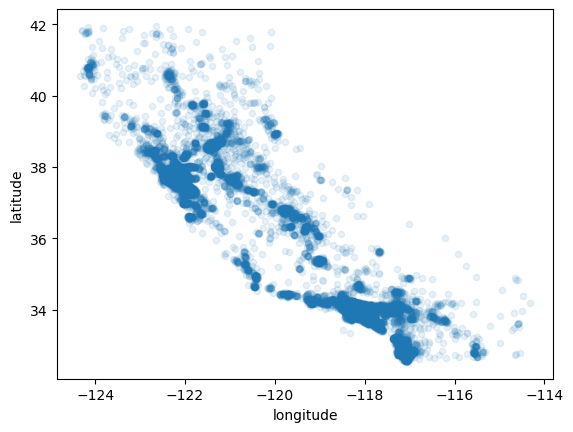

In [20]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

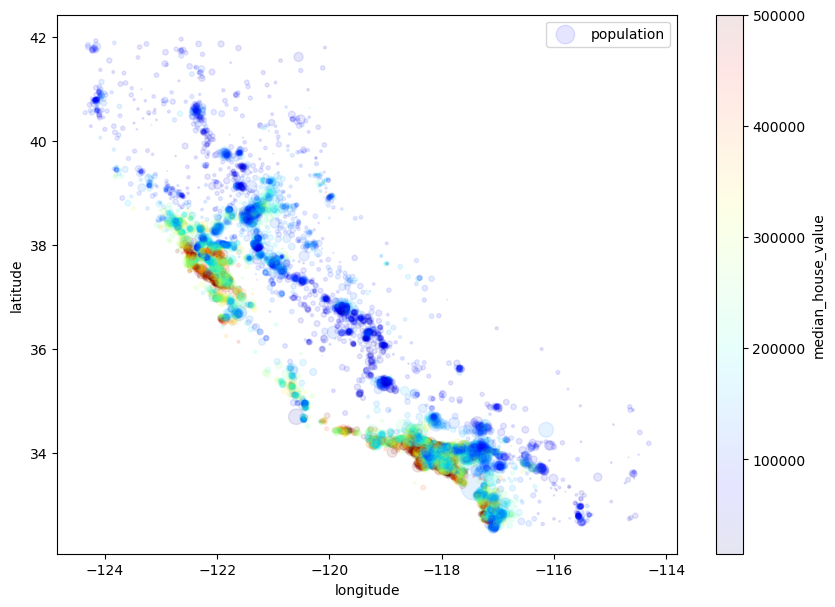

In [21]:
data.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1,
            s=data["population"]/100, label="population", figsize=(10,7),
         c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True
)
plt.legend()

In [22]:
# Correlations

corr=data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [23]:
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

<Axes: >

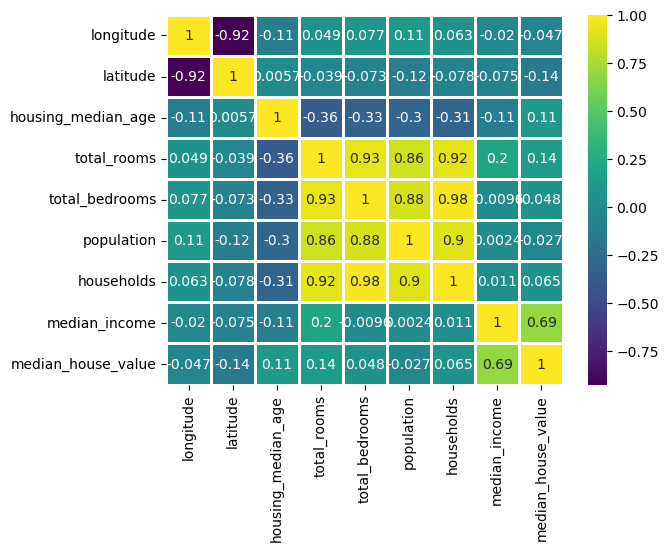

In [24]:
sns.heatmap(corr,annot=True,linewidths=1,cmap="viridis")

In [25]:
py.init_notebook_mode(connected=True)
map=px.scatter_mapbox(data,
                      lat='latitude',
                      lon='longitude',
                      color='median_house_value',
                      size='population',
                      hover_name='ocean_proximity',
                      zoom=4,
                      height=1000)
map.update_layout(mapbox_style='open-street-map')
map.show()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

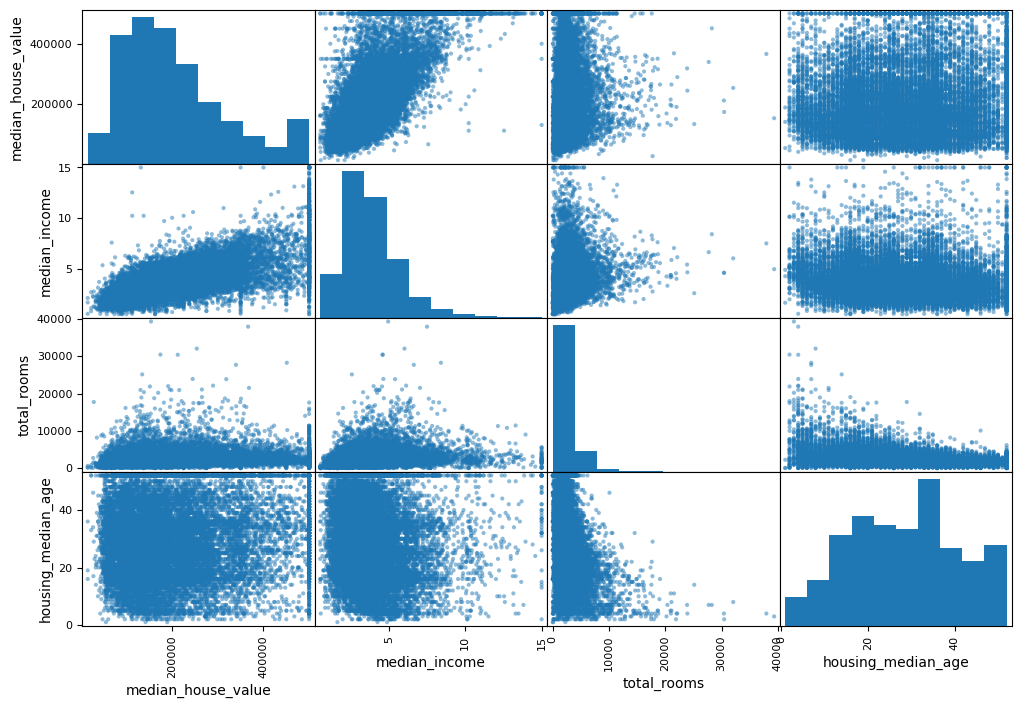

In [26]:
#another method for checking Correlations using python is scatter_matrix

att=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(data[att],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

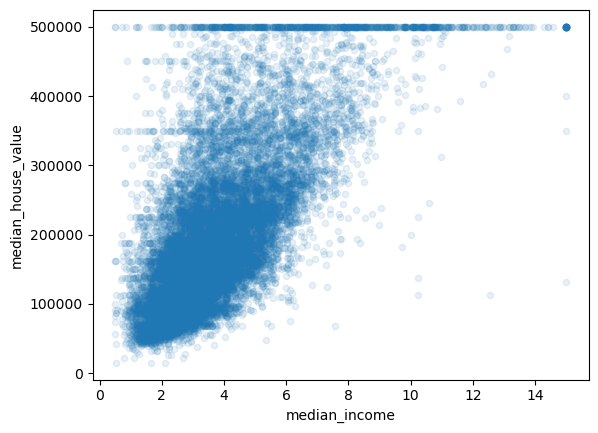

In [27]:
data.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

**Observations:- The correlation is indeed very strong**

In [28]:
#now lets create more attributes for better understanding

data["room_per_house"]=data["total_rooms"]/data["households"]
data["bedroom_per_room"]=data["total_bedrooms"]/data["total_rooms"]
data["pop_per_house"]=data["population"]/data["households"]

In [29]:
corr=data.corr()
corr["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
room_per_house        0.146255
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
pop_per_house        -0.021991
population           -0.026882
longitude            -0.047466
latitude             -0.142673
bedroom_per_room     -0.259952
Name: median_house_value, dtype: float64

**Here is new correlation matrix**

bedroom_per_room is more correlated with median house value

## Now Let us prepare data for ML Algorithms 🤖

**Data Cleaning**

In [30]:
# lets create a copy again for data cleaning
# Note:- drop function creates a copy

In [31]:
info=strat_train.drop("median_house_value",axis=1)
info_labels = strat_train["median_house_value"].copy()

In [32]:
# Null Values Check
if info.isnull().values.any():
    print("null hai replace karo!!")

null hai replace karo!!


In [33]:
# dropna(), drop(), fillna()
#going with simpleimputer 

info_num = info.drop("ocean_proximity", axis=1)  #numerical data only

impute = SimpleImputer(strategy = "median")
impute.fit(info_num)

SimpleImputer(strategy='median')

In [34]:
impute.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [35]:
info_num.median().values

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [36]:
x=impute.transform(info_num)  #plane numpy array
info_tr=pd.DataFrame(x,columns=info_num.columns,index=info_num.index)   #converting in pd Dataframe

**Handling Text & Categorical Attributes**

In [37]:
#tere is only one text attribute "ocean_proximity" attribute
#Let's Play with It

In [38]:
info_cat=info[["ocean_proximity"]]
info_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [39]:
#converting to numerical data using OneHotEncoder

ohe=OneHotEncoder()
info_cat_1hot=ohe.fit_transform(info_cat)
info_cat_1hot[:10]

<10x5 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [40]:
info_cat_1hot.toarray()  #converting it to dense numpy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [41]:
ohe.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [42]:
#Custom Transformers

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
 def __init__(self, add_bedrooms_per_room = True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
 def fit(self, X, y=None):
    return self # nothing else to do
 def transform(self, X):
    room_per_house = X[:, rooms_ix] / X[:, households_ix]
    pop_per_house = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
        bedroom_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
        return np.c_[X, room_per_house, pop_per_house,
                     bedroom_per_room]
    else:
        return np.c_[X, room_per_house, pop_per_house]
    
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
info_extra_att = attr_adder.transform(info.values)


In [43]:
# Pipeline

num_pipeline = Pipeline([
    ('impute', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

info_num_tr = num_pipeline.fit_transform(info_num)

In [44]:
num_att= list(info_num)
cat_att= ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_att),
    ("cat", OneHotEncoder(), cat_att),
])

In [45]:
info_prep = full_pipeline.fit_transform(info)

## Select & Train a Model 🎯

**Linear Regression 📈**

In [46]:
reg=LinearRegression()
reg.fit(info_prep,info_labels)

LinearRegression()

In [47]:
# Exicted Lets try few predictions

some_D = info.iloc[:5]
some_L = info_labels.iloc[:5]
some_prep = full_pipeline.transform(some_D)

print("Predictions: ", reg.predict(some_prep))

print("Labels: ", list(some_L))

Predictions:  [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [48]:
info_pred = reg.predict(info_prep)
mse=mean_squared_error(info_labels, info_pred)    #using mean squared error
rmse=np.sqrt(mse)
rmse

68627.87390018745

**not a great score lets try something else**

**Decision Tree Regressor 🌳**

In [49]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(info_prep , info_labels)

DecisionTreeRegressor()

In [50]:
info_pred = tree_reg.predict(info_prep)
tree_mse = mean_squared_error(info_labels, info_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

**Cross Validation 🔁**

In [51]:
score = cross_val_score(tree_reg, info_prep, info_labels, scoring='neg_mean_squared_error',cv=10)
tree_rmse_score = np.sqrt(-score)

In [52]:
# lets check for results Lets do it by creating a function

def display_score(score):
    print("Score: ", score )
    print("Mean: ", score.mean())
    print("Standard Dev: ", score.std())

In [53]:
display_score(tree_rmse_score)

Score:  [72496.43908211 70214.15498383 67497.71811058 72143.50710807
 69979.78019498 76904.06491243 72290.80917559 72485.61016059
 69188.57728126 71509.17323228]
Mean:  71470.98342417176
Standard Dev:  2398.4324435108174


In [54]:
lin_score=cross_val_score(reg, info_prep,info_labels, scoring="neg_mean_squared_error",cv=10)

In [55]:
lin_rmse_score=np.sqrt(-lin_score)

display_score(lin_rmse_score)

Score:  [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean:  69104.07998247063
Standard Dev:  2880.3282098180634


**hence decision tree perfoms worse than linear regression**

**lets try one more model random forest as it usese multiple dt** 

**Random Forest Regressor:🌲🌲🌲**

In [56]:
forest_reg = RandomForestRegressor()
forest_reg.fit(info_prep, info_labels)


RandomForestRegressor()

In [57]:
info_pred = forest_reg.predict(info_prep)
forest_mse = mean_squared_error(info_labels, info_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18600.54387760594

In [58]:
score = cross_val_score(forest_reg, info_prep, info_labels, scoring='neg_mean_squared_error',cv=10)
forest_rmse_score = np.sqrt(-score)

display_score(forest_rmse_score)

Score:  [51441.45058185 48596.69846398 46596.9846631  52120.2025032
 47491.90048097 51939.64985057 52369.90344649 49726.66206841
 48089.54041665 53802.94165191]
Mean:  50217.593412713
Standard Dev:  2313.126019573105


## Fine-Tune Your Model 🔧

**Grid Search 🔍🔄**

In [59]:
para_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
             {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
            ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, para_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(info_prep, info_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [61]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [62]:
cvres = grid_search.cv_results_

In [63]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63739.30431229052 {'max_features': 2, 'n_estimators': 3}
55541.79093217787 {'max_features': 2, 'n_estimators': 10}
52783.882865425665 {'max_features': 2, 'n_estimators': 30}
60987.50502688112 {'max_features': 4, 'n_estimators': 3}
53110.581479358836 {'max_features': 4, 'n_estimators': 10}
50483.46634169013 {'max_features': 4, 'n_estimators': 30}
58387.20566759404 {'max_features': 6, 'n_estimators': 3}
51899.663397582655 {'max_features': 6, 'n_estimators': 10}
50098.44913082649 {'max_features': 6, 'n_estimators': 30}
57469.920080000025 {'max_features': 8, 'n_estimators': 3}
52418.13843316156 {'max_features': 8, 'n_estimators': 10}
50446.305068567475 {'max_features': 8, 'n_estimators': 30}
62367.81988573832 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54104.428718255615 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59934.94305323134 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52855.28524125178 {'bootstrap': False, 'max_features': 3, 'n_estimator

**Analyzing Model and Errors🔍📊**

In [64]:
feature_imp = grid_search.best_estimator_.feature_importances_
feature_imp

array([7.48842711e-02, 7.17809614e-02, 4.23238194e-02, 1.66908408e-02,
       1.68359459e-02, 1.61606867e-02, 1.57137009e-02, 3.29669678e-01,
       5.40571611e-02, 1.08621994e-01, 7.97873203e-02, 1.26240638e-02,
       1.52998869e-01, 4.68346728e-05, 3.96673440e-03, 3.83711832e-03])

In [65]:
extra_att = ['room_per_hhold','pop_per_hhold','bedroom_per_hhold']
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_att + extra_att + cat_one_hot_attribs
sorted(zip(feature_imp, attributes), reverse=True)

[(0.329669678324408, 'median_income'),
 (0.15299886949683625, 'INLAND'),
 (0.10862199354042822, 'pop_per_hhold'),
 (0.07978732026098885, 'bedroom_per_hhold'),
 (0.07488427109654354, 'longitude'),
 (0.07178096135827476, 'latitude'),
 (0.054057161080767684, 'room_per_hhold'),
 (0.042323819433983466, 'housing_median_age'),
 (0.01683594585791184, 'total_bedrooms'),
 (0.01669084077481534, 'total_rooms'),
 (0.016160686698786012, 'population'),
 (0.015713700850334755, 'households'),
 (0.012624063833651443, '<1H OCEAN'),
 (0.003966734397621656, 'NEAR BAY'),
 (0.003837118321819008, 'NEAR OCEAN'),
 (4.683467282917515e-05, 'ISLAND')]

**Less useful features can be drop**
**But Ocean_proximity is really useful feature**

## Evaluation on Test Data 📝🧪

In [66]:
final_model = grid_search.best_estimator_

X_test = strat_test.drop("median_house_value", axis=1)
y_test = strat_test["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

47601.80498754895


In [67]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([45602.50264009, 49520.45465366])

### looks Great! 📈😄